In [1]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

import matplotlib.colors as mcolors
color = mcolors.TABLEAU_COLORS #顏色變化

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
BTC_technical_indicators = pd.read_csv(r".\PTT_data\Data preprocessing\比特幣與交易量技術指標.csv")
BTC_technical_indicators.head()

,date,open,high,low,close,price difference(後天-前天),12month,收盤價一年總平均,BTC_Transactions,每日量差(後天-前天),...,close_EMA100,close_EMA200,MACD,baseline,bar,Rolling Mean,Bollinger High,Bollinger Low,close_MA3,volume_MA3
0,2022-01-01,46230.00,47960.98,46199.90,47777.42,NaN,41111.84968,28188.3386,186662,NaN,...,47777.420000,47777.420000,0.000000,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,47745.25,47989.00,46660.00,47350.22,-427.20,40763.18214,NaN,196707,10045.0,...,47768.960594,47773.169254,-34.078632,0,-27.262906,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,47290.55,47586.58,45692.13,46439.89,-910.33,41969.57032,NaN,234653,37946.0,...,47742.642364,47759.902793,-133.008973,0,-100.954597,NaN,NaN,NaN,47189.176667,206007.333333
3,2022-01-04,46464.01,47526.00,45539.05,45820.00,-619.89,41415.15067,NaN,274397,39744.0,...,47704.570238,47740.600278,-258.452641,0,-181.118612,NaN,NaN,NaN,46536.703333,235252.333333
4,2022-01-05,45828.77,46855.06,42413.59,43435.80,-2384.20,31679.18548,NaN,272005,-2392.0,...,47620.040135,47697.766445,-543.981981,0,-373.318362,NaN,NaN,NaN,45231.896667,260351.666667


In [3]:
BTC_technical_indicators['date'] = pd.to_datetime(BTC_technical_indicators['date'])
BTC_technical_indicators['date'] = BTC_technical_indicators['date'].dt.strftime('%Y-%m-%d')
# BTC_technical_indicators.set_index('date', inplace=True)
BTC_technical_indicators.head()

,date,open,high,low,close,price difference(後天-前天),12month,收盤價一年總平均,BTC_Transactions,每日量差(後天-前天),...,close_EMA100,close_EMA200,MACD,baseline,bar,Rolling Mean,Bollinger High,Bollinger Low,close_MA3,volume_MA3
0,2022-01-01,46230.00,47960.98,46199.90,47777.42,NaN,41111.84968,28188.3386,186662,NaN,...,47777.420000,47777.420000,0.000000,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,47745.25,47989.00,46660.00,47350.22,-427.20,40763.18214,NaN,196707,10045.0,...,47768.960594,47773.169254,-34.078632,0,-27.262906,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,47290.55,47586.58,45692.13,46439.89,-910.33,41969.57032,NaN,234653,37946.0,...,47742.642364,47759.902793,-133.008973,0,-100.954597,NaN,NaN,NaN,47189.176667,206007.333333
3,2022-01-04,46464.01,47526.00,45539.05,45820.00,-619.89,41415.15067,NaN,274397,39744.0,...,47704.570238,47740.600278,-258.452641,0,-181.118612,NaN,NaN,NaN,46536.703333,235252.333333
4,2022-01-05,45828.77,46855.06,42413.59,43435.80,-2384.20,31679.18548,NaN,272005,-2392.0,...,47620.040135,47697.766445,-543.981981,0,-373.318362,NaN,NaN,NaN,45231.896667,260351.666667


In [4]:
BTC_technical_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Columns: 126 entries, date to volume_MA3
dtypes: float64(123), int64(2), object(1)
memory usage: 359.4+ KB


# 最大、小值與平均值(收盤價、交易量)

In [5]:
#收盤價
average_price = BTC_technical_indicators['close'].mean()
print("收盤價平均值:",average_price)

max_price = BTC_technical_indicators['close'].max()
print("收盤價最大值:",max_price)

min_price = BTC_technical_indicators['close'].min()
print("收盤價最小值:",min_price)

收盤價平均值: 28188.338602739725
收盤價最大值: 47777.42
收盤價最小值: 15766.0


In [6]:
#交易量
average_price_V = BTC_technical_indicators['BTC_Transactions'].mean()
print("交易量平均值:",average_price_V)

max_price_V = BTC_technical_indicators['BTC_Transactions'].max()
print("交易量最大值:",max_price_V)

min_price_V = BTC_technical_indicators['BTC_Transactions'].min()
print("交易量最小值:",min_price_V)

交易量平均值: 254940.24657534246
交易量最大值: 315602
交易量最小值: 186662


# 比特弊價收盤價(close)

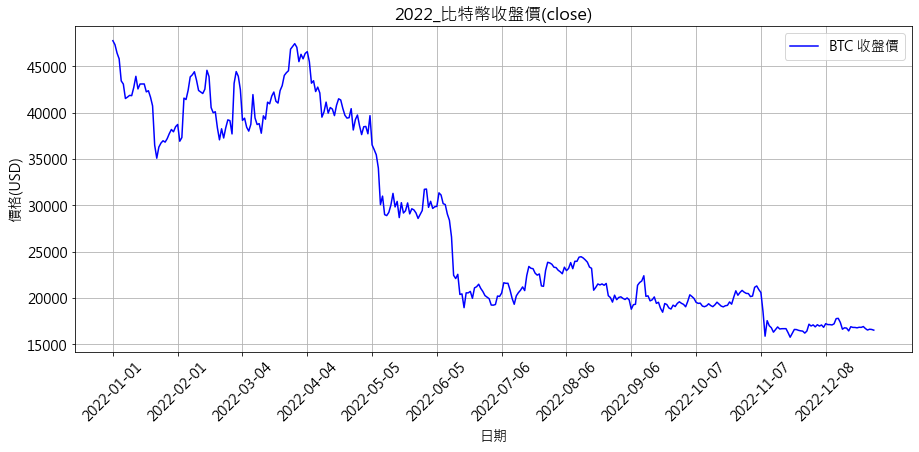

In [7]:
#論文
# 設定圖表大小
plt.figure(figsize=(15, 6))

# # 設定全局字型大小為 14
plt.rcParams.update({'font.size': 14})

# 繪製價格趨勢圖
plt.plot(BTC_technical_indicators['date'],BTC_technical_indicators['close'], color='b',label='BTC 收盤價')

# 設定圖表標題、標籤等
plt.title('2022_比特幣收盤價(close)')
plt.xlabel('日期')
plt.ylabel('價格(USD)')

# 設定 X 軸的間隔及標籤
plt.xticks(BTC_technical_indicators['date'][::31], rotation=45)
plt.grid()
plt.legend();
# plt.savefig(f'./Original_Data/9_價格_交易量情緒/2022_BTC_Close_Price.png',dpi=300, bbox_inches='tight')

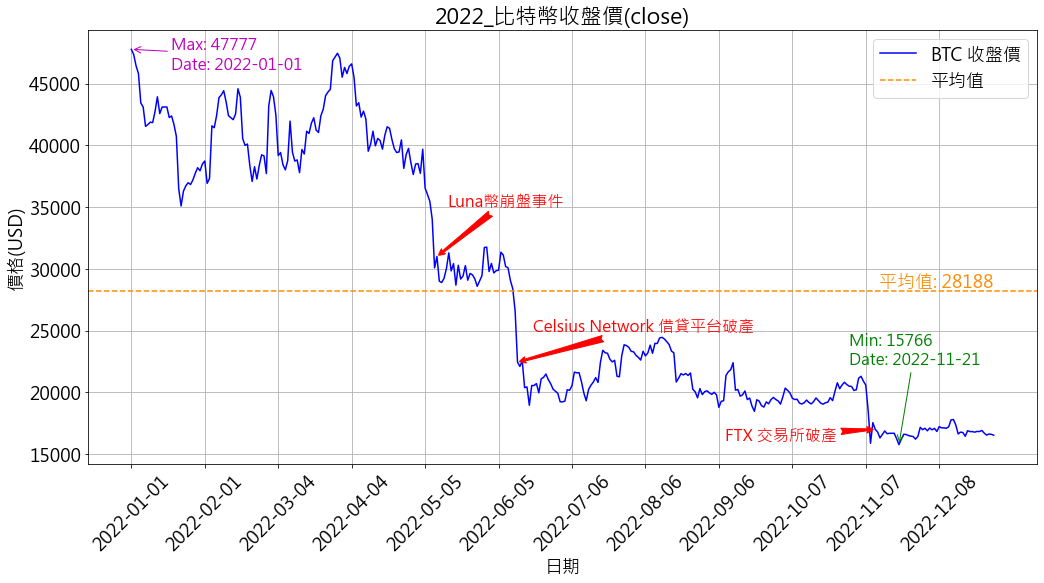

In [8]:
# 設定圖表大小
plt.figure(figsize=(17, 8))

# 設定全局字型大小為 16
plt.rcParams.update({'font.size': 18})

# 繪製價格趨勢圖
plt.plot(BTC_technical_indicators['date'], BTC_technical_indicators['close'], color='b', label='BTC 收盤價')

# 計算收盤價的最大值及其對應的日期
max_price = BTC_technical_indicators['close'].max()
max_date = BTC_technical_indicators['date'].iloc[BTC_technical_indicators['close'].idxmax()]

# 計算收盤價的最小值及其對應的日期
min_price = BTC_technical_indicators['close'].min()
min_date = BTC_technical_indicators['date'].iloc[BTC_technical_indicators['close'].idxmin()]

# 標示最大值的點及日期
plt.annotate(f'Max: {max_price:.0f}\nDate: {max_date}', xy=(max_date, max_price),
             xytext=(40, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='m'), fontsize=16, color='m')

# 標示最小值的點及日期
plt.annotate(f'Min: {min_price:.0f}\nDate: {min_date}', xy=(min_date, min_price),
             xytext=(-50, 80), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='g'), fontsize=16, color='g')

# 繪製平均值的水平線
plt.axhline(average_price, color='darkorange', linestyle='--', label='平均值')

# 在圖表上標示平均值數字
plt.text(BTC_technical_indicators['date'].iloc[-1], average_price, f'平均值: {average_price:.0f}', ha='right', va='bottom', color='darkorange')

# 標示五月崩盤事件的日期
plt.annotate('Luna幣崩盤事件', xy=('2022-05-10', BTC_technical_indicators['close'].loc[BTC_technical_indicators['date'] == '2022-05-10'].values[0]),
             xytext=(10, 50), textcoords='offset points', arrowprops=dict(arrowstyle='fancy', color='r'), fontsize=16, color='r')#5/10號跌31000美元

# 標示六月崩盤事件的日期
plt.annotate('Celsius Network 借貸平台破產', xy=('2022-06-13', BTC_technical_indicators['close'].loc[BTC_technical_indicators['date'] == '2022-06-13'].values[0]),
             xytext=(15, 30), textcoords='offset points', arrowprops=dict(arrowstyle='fancy', color='r'), fontsize=16, color='r')#5/10號跌31000美元

# 標示11月崩盤事件的日期
plt.annotate('FTX 交易所破產', xy=('2022-11-11', BTC_technical_indicators['close'].loc[BTC_technical_indicators['date'] == '2022-11-11'].values[0]),
             xytext=(-150, -10), textcoords='offset points', arrowprops=dict(arrowstyle='fancy', color='r'), fontsize=16, color='r')#5/10號跌31000美元

# 設定圖表標題、標籤等
plt.title('2022_比特幣收盤價(close)')
plt.xlabel('日期')
plt.ylabel('價格(USD)')

# 設定 X 軸的間隔及標籤
plt.xticks(BTC_technical_indicators['date'][::31], rotation=45)
plt.grid()
plt.legend();
# plt.savefig(f'./Original_Data/9_價格_交易量情緒/2022_BTC_Close_Price02.png',dpi=300, bbox_inches='tight')

# 交易量(BTC_Transactions)

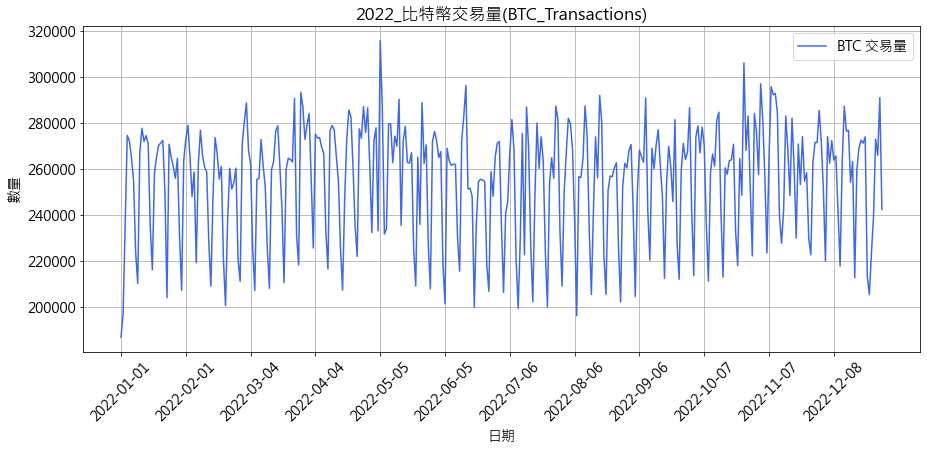

In [9]:
#論文
# 設定圖表大小
plt.figure(figsize=(15, 6))

# # 設定全局字型大小為 14
plt.rcParams.update({'font.size': 14})

# 繪製價格趨勢圖
plt.plot(BTC_technical_indicators['date'],BTC_technical_indicators['BTC_Transactions'], color='royalblue',label='BTC 交易量')

# 設定圖表標題、標籤等
plt.title('2022_比特幣交易量(BTC_Transactions)')
plt.xlabel('日期')
plt.ylabel('數量')

# 設定 X 軸的間隔及標籤
plt.xticks(BTC_technical_indicators['date'][::31], rotation=45)
plt.grid()
plt.legend();
# plt.savefig(f'./Original_Data/9_價格_交易量情緒/2022_BTC_Transactions.png',dpi=300, bbox_inches='tight')

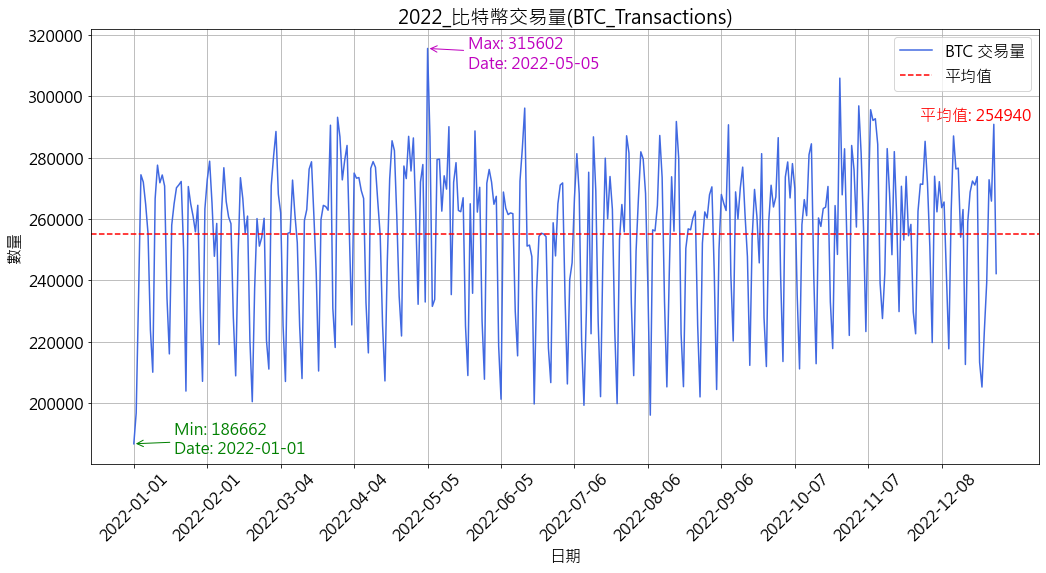

In [10]:
# 設定圖表大小
plt.figure(figsize=(17, 8))

# 設定全局字型大小為 14
plt.rcParams.update({'font.size': 16})

# 繪製價格趨勢圖
plt.plot(BTC_technical_indicators['date'], BTC_technical_indicators['BTC_Transactions'], color='royalblue', label='BTC 交易量')

# 計算收盤價的最大值及其對應的日期
max_price = BTC_technical_indicators['BTC_Transactions'].max()
max_date = BTC_technical_indicators['date'].iloc[BTC_technical_indicators['BTC_Transactions'].idxmax()]

# 計算收盤價的最小值及其對應的日期
min_price = BTC_technical_indicators['BTC_Transactions'].min()
min_date = BTC_technical_indicators['date'].iloc[BTC_technical_indicators['BTC_Transactions'].idxmin()]


# 標示最大值的點及日期
plt.annotate(f'Max: {max_price:.0f}\nDate: {max_date}', xy=(max_date, max_price),
             xytext=(40, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='m'), fontsize=16, color='m')

# 標示最小值的點及日期
plt.annotate(f'Min: {min_price:.0f}\nDate: {min_date}', xy=(min_date, min_price),
             xytext=(40, -10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='g'), fontsize=16, color='g')

average_price_V = BTC_technical_indicators['BTC_Transactions'].mean()

# 繪製平均值的水平線
plt.axhline(average_price_V, color='r', linestyle='--', label='平均值')

# 在圖表上標示平均值數字，調整位置
plt.annotate(f'平均值: {average_price_V:.0f}', 
             xy=(BTC_technical_indicators['date'].iloc[-1], average_price_V),
             xytext=(35, 110),
             textcoords='offset points',
             ha='right',
             va='bottom',
             color='r')

# 設定圖表標題、標籤等
plt.title('2022_比特幣交易量(BTC_Transactions)')
plt.xlabel('日期')
plt.ylabel('數量')

# 設定 X 軸的間隔及標籤
plt.xticks(BTC_technical_indicators['date'][::31], rotation=45)
plt.grid()
plt.legend();
# plt.savefig(f'./Original_Data/9_價格_交易量情緒/2022_BTC_Transactions_01.png',dpi=300, bbox_inches='tight')